In [1]:
# --- Core Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# --- Load Data ---
# Load time series or tabular data, parse the date column, and sort by index
df = pd.read_csv("../data/takehome_data.csv", parse_dates=["date"])
df.set_index("date", inplace=True)
df = df.sort_index()


# --- Load Data ---
df = pd.read_csv("../data/takehome_data.csv", parse_dates=["date"])
df.set_index("date", inplace=True)
df = df.sort_index()

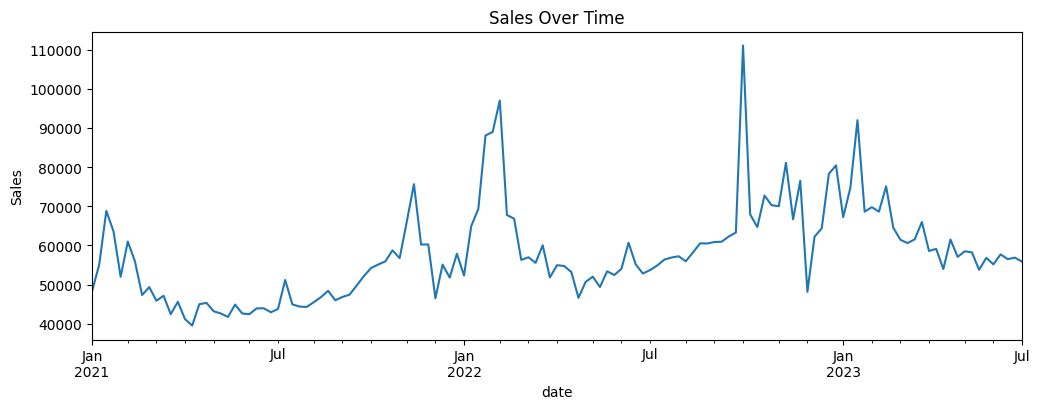

In [2]:
# Plot sales over time
df['sales'].plot(figsize=(12, 4), title="Sales Over Time")
plt.ylabel("Sales")
plt.show()

In [3]:
# Add lag features based on autocorrelationa and 
for i in range(1,6):
    col_name = "lag_" + str(i)
    df[col_name] = df["sales"].shift(i)

# rolling averages
df["rolling_3"] = df["sales"].rolling(window=3).mean().shift(1)
df["rolling_7"] = df["sales"].rolling(window=7).mean().shift(1)


# Drop rows with any NaNs caused by shifting or rolling
df = df.dropna()
df

,sales,lag_1,lag_2,lag_3,lag_4,lag_5,rolling_3,rolling_7
date,,,,,,,,
2021-02-20,47341.08,55942.14,61008.81,52006.13,63638.06,68850.32,56319.026667,57828.865714
2021-02-27,49371.61,47341.08,55942.14,61008.81,52006.13,63638.06,54764.010000,57692.708571
2021-03-06,45877.05,49371.61,47341.08,55942.14,61008.81,52006.13,50884.943333,56879.735714
2021-03-13,47153.02,45877.05,49371.61,47341.08,55942.14,61008.81,47529.913333,53597.840000
2021-03-20,42449.10,47153.02,45877.05,49371.61,47341.08,55942.14,47467.226667,51242.834286
...,...,...,...,...,...,...,...,...
2023-06-03,55181.39,56848.10,53782.50,58242.98,58527.58,57086.86,56291.193333,57144.115714
2023-06-10,57727.64,55181.39,56848.10,53782.50,58242.98,58527.58,55270.663333,57313.778571
2023-06-17,56510.76,57727.64,55181.39,56848.10,53782.50,58242.98,56585.710000,56771.007143


In [4]:
# Define features and target
features = ["lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "rolling_3", "rolling_7"]
X = df[features]
y = df["sales"]

# Train-test split with no shuffling to preserve time order
X_train, X_test, y_train, y_test =  train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

In [7]:
ridge = make_pipeline(StandardScaler(), Ridge(alpha=1.0))
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


print("Ridge MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("Ridge RMSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge MAE: 4120.201776447298
Ridge RMSE: 41309018.3971658
Ridge R²: 0.4230984343825994
